# iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv feature 사용 
    - in_features : petal.length 등  
    - out_feature : petal.width 1개
- 구현 프레임 워크 : pytorch


## [1] 모듈 로딩 및 데이터 준비

In [97]:
# 모듈 로딩 

import torch                    # 텐서 및 수치 계산 함수 관련 모듈 
import torch.nn as nn           # 인공신경망 관련 모듈 
import torch.nn.functional as F    # 손실, 거래 등 함수 관련 모듈 
import torch.optim as optimizer # 최적화 기법 관련 모듈 

import pandas as pd             # 데이터 파일 분석 과련 모듈 
import matplotlib.pyplot as plt

In [98]:
torch.manual_seed(1)

In [99]:
# 데이터 로딩 : csv -> DF 

DATA_FILE = '../DATA/iris.csv'

iris_df = pd.read_csv(DATA_FILE, usecols=[0,1,2,3])
iris_df.head(2)


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


# [2] 모델 준비 
- 학습 방법 : 지도학습 - 회귀 
- 알고리즘 : 선형관계 -> 선형모델 -> nn.Linear

In [100]:
# in_features : petal.length 등  
# out_feature : petal.width 1개

model = nn.Linear(3,1)

In [101]:
# 가중치와 절편 확인 
for name, param in model.named_parameters():

    print(f'[{name}] {param}\n')

[weight] Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True)

[bias] Parameter containing:
tensor([0.2710], requires_grad=True)



## [3] 최적화 인스턴스 준비 

In [102]:
# 모델의 가중치와 절편 최적화 ==> 인스턴스에 전달 
adam_optim = optimizer.Adam(model.parameters(), lr = 0.1)

# [4] 학습 ==> 개발자가 구현 

### [4-1] 데이터셋 Tensor화 진행 : 데이터준비 시 진행하거나 또는 학습 전 진행 

In [103]:
feature_ts = torch.from_numpy(iris_df[iris_df.columns[:-1]].values).float()
feature_ts.ndim

2

In [104]:
target_ts = torch.from_numpy(iris_df[['petal.width']].values).float()
target_ts.ndim

2

### [4-2] 학습 진행 
- 학습 횟수 결정 => 에포크 설정 
- 학습 결과 저장 => 손실저장 변수

In [105]:
EPOCH = 10
loss_history = [] # 시각화 하기 위해 리스트에 담음 

In [106]:
# 모델 학습 함수 
def training():

    EPOCH = 10
    loss_history = []

    for epoch in range(EPOCH):
        # -(1) 학습 진행 - forward 
        pre_y = model(feature_ts)

        # -(2) 오차계산 - 손실함수 
        loss = F.mse_loss(pre_y, target_ts)
        loss_history.append(loss.item()) # tensor로 들어가서 item으로 뺌 

        # -(3) 최적화 - 가중치, 절편 업데이트 backward 
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        # -(4) 학습 결과 출력 및 저장 
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history

In [107]:
# 모델 학습 진행 

loss = training()
loss

[0/10] LOSS : 0.6651504039764404
[1/10] LOSS : 1.2201019525527954
[2/10] LOSS : 0.5813901424407959
[3/10] LOSS : 0.3805747330188751
[4/10] LOSS : 0.640357255935669
[5/10] LOSS : 0.5439753532409668
[6/10] LOSS : 0.2701011300086975
[7/10] LOSS : 0.21115203201770782
[8/10] LOSS : 0.33068281412124634
[9/10] LOSS : 0.34037071466445923


[0.6651504039764404,
 1.2201019525527954,
 0.5813901424407959,
 0.3805747330188751,
 0.640357255935669,
 0.5439753532409668,
 0.2701011300086975,
 0.21115203201770782,
 0.33068281412124634,
 0.34037071466445923]

<function matplotlib.pyplot.show(close=None, block=None)>

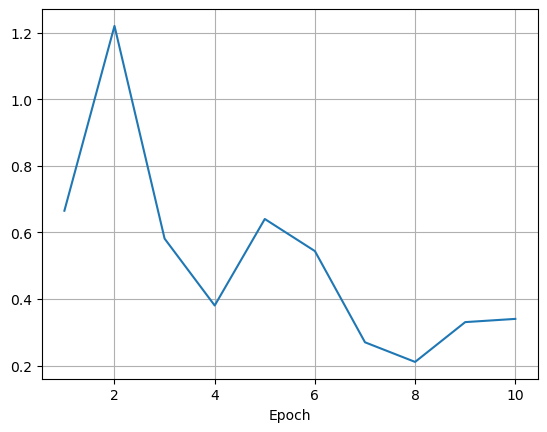

In [109]:
# 학습 후 loss 시각화 

plt.plot(range(1,11), loss)
plt.grid()
plt.xlabel('Epoch')
plt.show